# Introduction to PyTorch

### 28th October 2020 by Juan-José Giraldo and Mauricio A Álvarez

In this Notebook, we look at the torch library in Python that allows automatic differentiation. PyTorch will be used to implement different neural network models later on.

### Tensors

A tensor generalises the concept of vectors and matrices to an arbitrary number of dimensions.

Another name for the same concept is multidimensional arrays. The dimensionality of a tensor is the number of indexes used to refer to scalar values within the tensor. The cell below shows an example initialising a Tensor uniformly for 1D, 2D and 3D:

>**Tensor** = **multidimensional arrays**

In [4]:
# We first import the torch library that comes with the Anaconda distribution
import torch 
# Tensor 1D presents 1 index
y = torch.rand([3])
print('Tensor 1D presents one index','with shape', y.shape,':\n',y) #get specific size with .shape
# Tensor 2D presents 2 indexes
y = torch.rand([2,3])
print('\nTensor 2D presents two indexes','with shape',y.shape,':\n',y)
#Tensor 3D presents 3 indexes
y = torch.rand([5,2,3])
print('\nTensor 3D presents three indexes','with shape',y.shape,':\n',y)

Tensor 1D presents one index with shape torch.Size([3]) :
 tensor([0.6441, 0.5082, 0.4328])

Tensor 2D presents two indexes with shape torch.Size([2, 3]) :
 tensor([[0.1027, 0.3788, 0.5346],
        [0.0007, 0.0619, 0.5751]])

Tensor 3D presents three indexes with shape torch.Size([5, 2, 3]) :
 tensor([[[0.1280, 0.6951, 0.5910],
         [0.9122, 0.5853, 0.3991]],

        [[0.7031, 0.3923, 0.3849],
         [0.9856, 0.5497, 0.9775]],

        [[0.2586, 0.8982, 0.1232],
         [0.3704, 0.8430, 0.7922]],

        [[0.8782, 0.3550, 0.8269],
         [0.8157, 0.8056, 0.9252]],

        [[0.6363, 0.6206, 0.4654],
         [0.7256, 0.1597, 0.3809]]])


In [17]:
# Create a tensor with specific values
# NOTE: what if I do not specify a dtype?
# the torch.float32 is the default value for dtype
x = torch.tensor([4.0,5.0])
y = torch.tensor([2.0,3.0],dtype=torch.float32)

# print(type(x))
# print(x.dtype)

# Tensor multiplication (point-wise multiplication)
print(x*y)
print(y @ x)
print(x @ y)

tensor([ 8., 15.])
tensor(23.)
tensor(23.)


### Initialise a tensor with torch.zeros or torch.ones 

In [19]:
# NOTE: Rather than a list, can shape parameter be a tuple? YES.
# x_zeros = torch.zeros([3,4])
x_zeros = torch.zeros((3,4))
print('x_zeros:',x_zeros,'with shape',x_zeros.shape,'\n')
x_ones = torch.ones([2,6])
print('x_ones:',x_ones,'with shape',x_ones.shape)

x_zeros: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) with shape torch.Size([3, 4]) 

x_ones: tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]) with shape torch.Size([2, 6])


### Reshape a tensor using .view

In [21]:
y = torch.ones([3,2])
y_reshaped = y.view(6,1)  # in contrast to the common numpy library, we use .view instead of .reshape
print(y)
print(y_reshaped)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


### Numpy interoperability 

PyTorch tensors can be converted efficiently to NumPy arrays and **vice versa**. By doing so, you can leverage the huge swath of functionality in the wider Python ecosystem that has built up around the NumPy array type.

By using `torch.numpy()`, a `torch.Tensor` object can be transformed to `numpy.ndarray` object.  
By using `torch.from_numpy()`, a `numpy.ndarry` object can be transformed to `torch.Tensor` object.

> It seems that **ALL** the methods used is from `torch` library only.

In [23]:
# Tensor_torch to tensor Numpy
Tensor_torch = torch.ones(3,4)
Tensor_numpy = Tensor_torch.numpy() #Returns a NumPy multidim. array of the right size, shape and numerical type.
print('Array in numpy form with shape', Tensor_numpy.shape,':\n',Tensor_numpy)
print(type(Tensor_numpy))

# Tensor Numpy to Tensor_torch
import numpy as np
Tensor_np = np.random.randn(5,8)    
Tensor_numpy_to_torch = torch.from_numpy(Tensor_np)
print('\nArray from Numpy to Torch with shape', Tensor_numpy_to_torch.shape,':\n',Tensor_numpy_to_torch)
print(type(Tensor_numpy_to_torch))

Array in numpy form with shape (3, 4) :
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
<class 'numpy.ndarray'>

Array from Numpy to Torch with shape torch.Size([5, 8]) :
 tensor([[-1.4917,  1.9787,  0.6947, -1.2566,  1.9792,  0.0444, -1.8259,  0.6694],
        [-0.6118, -0.5145, -0.0409,  0.1969,  0.1275,  0.1419, -0.4488,  1.6223],
        [-0.0224,  1.4420, -1.2156, -1.5845, -0.1355,  0.1579,  1.1677, -0.4074],
        [-0.5969, -0.1922,  0.3732,  1.0014,  0.3179, -0.8391,  0.4310, -0.3145],
        [-0.9787, -1.2588, -1.9088,  0.2201, -0.0962,  1.1675,  0.8692,  1.9644]],
       dtype=torch.float64)
<class 'torch.Tensor'>


## Automatic Differentiation

PyTorch allows to automatically obtain the gradients of a tensor with respect to a defined function. When creating the tensor, we have to indicate that it requires the gradient computation using the flag `requires_grad`  

In [24]:
x = torch.rand(3,requires_grad=True)
print(x)

tensor([0.5236, 0.9179, 0.1506], requires_grad=True)


Notice that now the Tensor shows the flag `requires_grad` as True. We can also activate such a flag in a Tensor already created as follows:

In [26]:
x = torch.tensor([1.0,2.0,3.0])
print(x)
x.requires_grad_(True)
print(x)

tensor([1., 2., 3.])
tensor([1., 2., 3.], requires_grad=True)


Let us define a function $y=x^2+5$. The function $y$ will not only carry the result of evaluating $x$, but also the gradient function $\frac{\partial y}{\partial x}$ called `grad_fn` in the new tensor $y$

In [29]:
x = torch.tensor([2.0])
print(x)

x.requires_grad_(True)  #indicate we will need the gradients with respecto to this variable
y = x**2 + 5
print(type(y))
print(y)

tensor([2.])
<class 'torch.Tensor'>
tensor([9.], grad_fn=<AddBackward0>)


To evaluate the partial derivative $\frac{\partial y}{\partial x}$, we use the `.backward()` function and the result of the gradient evaluation is stored in `x.grad` 

In [30]:
y.backward()  #dy/dx
print('PyTorch gradient:', x.grad)

#L et us compare with the analitical gradient of y = x**2+5
with torch.no_grad():    #this is to only use the tensor value without its gradient information
    dy_dx = 2*x  #analitical gradient
print('Analitical gradient:',dy_dx)

PyTorch gradient: tensor([4.])
Analitical gradient: tensor([4.])


If we evaluate a vector $\mathbf{w}=[w_1, \ldots, w_D]^{\top}$, to compute another vector $\mathbf{g}=[g_1, \ldots, g_D]^{\top}$ with elements $g_i=w_i^2+5$, then we obtain a vector $\mathbf{g}$ that contains each evaluation of the function. If we want to obtain the gradient w.r.t $\mathbf{w}$ by using "g.backward()", we have to bypass a vector of size equal to w.shape to the function, i.e., "g.backward(vect)". 

In [58]:
w = torch.tensor([1.0,2.0,3.0])
w.requires_grad_(True)
# print(w.grad) # It will be None

g = w**2+5
# Below, the values [1.0,1.0,1.0] are multiplied by the gradient g.backward(vect)
# of course using the ones does not modify the value of the gradient
# What if I do not specify a dtype? Will it be automatically set to torch.float32? YES
# vect = torch.tensor([1.0,1.0,1.0],dtype=torch.float32) 
# vect = torch.tensor(np.ones_like(w.detach().numpy())) 
# print(vect.dtype) # torch.float32

# NOTE: There is also a ones_like in troch: torch.oneslike
g.backward(torch.from_numpy(np.ones_like(w.detach().numpy())))
g.backward(torch.from_numpy(np.ones_like(w.detach().numpy())))

# print(type(g.backward(vect))) # None type

# print(id(vect))
print(w.grad)

tensor([2., 4., 6.])


On the other hand, when accessing the gradients in a for loop, PyTorch acummulates the gradients at each
iteration. In order to avoid this behaviour, we have to use the function .grad.zero_() also at each iteration. See in the example below what happens when commenting and uncommenting the line "w.grad.zero_()":

In [70]:
#Pytorch uses a cumulative process for the gradients
w = torch.tensor([1.0,2.0,3.0])
w.requires_grad_(True)

g = w**3+5
for i in range(3):
    g.backward(torch.ones_like(w), retain_graph=True)
    print(w.grad)

    w.grad.zero_()    #this line avoids the acummulation of the gradients uncomment it to see its effect

tensor([ 3., 12., 27.])
tensor([ 3., 12., 27.])
tensor([ 3., 12., 27.])


###  Question 1

Verify that the gradients provided by PyTorch coincide with the analitical gradients of the function $f = \exp \big(-x^2-2x- \sin (x) \big)$ w.r.t $x$.

In [25]:
# Provide your answer here
x = torch.tensor([2.], requires_grad=True)
f = torch.exp(- torch.pow(x, 2) - 2 * x - torch.sin(x))

f.backward(torch.ones_like(x))

with torch.no_grad():
    df_dx = (-2 * x - 2 - torch.cos(x)) * torch.exp(- torch.pow(x, 2) - 2 * x - torch.sin(x))

# FIXME: Is it because the different underlying algorithm that causes the different result?
print(df_dx)
print(x.grad)
print(df_dx == x.grad)
# print(df_dx[2] == x.grad[2])
# print(df_dx[2], "==", x.grad[2])


tensor([-0.0008])
tensor([-0.0008])
tensor([True])


## Linear Regression Basic Example

We now provide a very simple example of linear regression with one input dimension, $y=wx+b$, and illustrate how we use PyTorch to optimise the parameters of the model

In [104]:
# Artificially generating data set with noises
true_w = 1.5
true_bias = 1.0
Ndata = 100 
x = torch.rand(Ndata)
y = true_w*x + true_bias + 0.05*torch.randn(Ndata)

# We make sure to set the requires_grad flag to True for both paratemers
w = torch.tensor(0., requires_grad=True)
bias = torch.tensor(0., requires_grad=True)

We now define two useful functions, the prediction function and the objective function

In [109]:
def model_prediction(x, w, bias):
    return w*x + bias


def loss_function(y, y_pred):
    return ((y_pred-y)**2).mean()  # Mean Squared Error (MSE)


And we use coordinate descent to estimate the parameters of the model

\begin{align*}
    w_{k+1} = w_k - \eta \frac{dE}{dw}\\ 
    b_{k+1} = b_k - \eta \frac{dE}{db}\\ 
\end{align*}

We know that there is a closed form solution for $w$ and $b$ through the normal equation. The example is for illustrative purposes.

In [110]:
Max_Niter = 500
step_size = 0.1
for Niter in range(Max_Niter):
    # Evaluate the prediction and the loss
    y_approx = model_prediction(x, w, bias)
    my_loss = loss_function(y, y_approx)

    # The function .backward() has to be called in order to load the grads in w.grad
    # Notice that here it is not necessary to bypass a vector since loss_function is a scalar function
    # REVIEW: it is the gradient of this loss function wrt w and bias that we were talking about
    my_loss.backward()

    with torch.no_grad():        # this line avoids the gradient update while allowing to change the value of w
        # it is necessary to avoid the grad update while modifying the variable
        w -= step_size * w.grad
        bias -= step_size * bias.grad

    # Make the zero gradient to avoid acummulation
    # NOTE: tensor.backward() function will add the corresponding gradient directly onto the tensor.grad object, so it is necessary to call tensor.zero_()
    w.grad.zero_()
    bias.grad.zero_()

    # We print the loss, and the parameters values every 50 iterations
    if Niter % 50 == 0:
        print(
            f'Iteration = {Niter+1}, Loss = {my_loss:.8f}, w = {w:.3f}, bias = {bias:.3f}')

print(
    f'Iteration = {Niter+1}, Loss = {my_loss:.8f}, w = {w:.3f}, bias = {bias:.3f}')


Iteration = 1, Loss = 0.00198660, w = 1.501, bias = 0.994
Iteration = 51, Loss = 0.00198660, w = 1.501, bias = 0.994
Iteration = 101, Loss = 0.00198660, w = 1.501, bias = 0.994
Iteration = 151, Loss = 0.00198660, w = 1.501, bias = 0.994
Iteration = 201, Loss = 0.00198660, w = 1.501, bias = 0.994
Iteration = 251, Loss = 0.00198660, w = 1.501, bias = 0.994
Iteration = 301, Loss = 0.00198660, w = 1.501, bias = 0.994
Iteration = 351, Loss = 0.00198660, w = 1.501, bias = 0.994
Iteration = 401, Loss = 0.00198660, w = 1.501, bias = 0.994
Iteration = 451, Loss = 0.00198660, w = 1.501, bias = 0.994
Iteration = 500, Loss = 0.00198660, w = 1.501, bias = 0.994


We finally plot the result

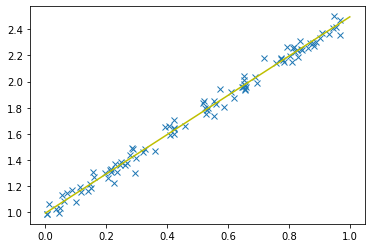

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,'x')
xtest = torch.linspace(0,1,10)
with torch.no_grad():
    y_pred = model_prediction(xtest,w,bias)
plt.plot(xtest,y_pred, "y")

### Loading a .csv dataset

We can take advantage of the interoperability between Numpy and PyTorch by loading a .csv data as a numpy array and transforming it to a Torch Tensor using `torch.from_numpy(dataset_np)`. 

In [116]:
# This cell is simply to download the winequality-red.csv dataset from its root url
import urllib.request
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', './winequality-red.csv')

('./winequality-red.csv', <http.client.HTTPMessage at 0x12beda490>)

`numpy.loadtxt(filepath, dtype, delimiter, skiprows)`

`filepath`:  
`dtype`:   
`delimiter`:  
`skiprows`:


In [3]:
import numpy as np
#In the line below we avoid the first row (skiprows=1) of .csv file that contains names
#the delimeter of data for this dataset is ";"
wine_np = np.loadtxt("./winequality-red.csv",dtype=np.float32,delimiter=";",skiprows=1)
print(wine_np.shape)
wine_torch = torch.from_numpy(wine_np)  #We take advantage of the interoperability with numpy

wine_torch.shape

(1599, 12)


NameError: name 'torch' is not defined

### Revisiting linear regression for the Rented Bike Dataset of lab notebook 2

We will implement a linear regression for the Rented Bike dataset previously used in Lab. 2. We will use the same data preparation through `sklearn.preprocessing`: the OneHotEncoder() that allows to transform a categorical variable to a one-hot encoding representation, and StandardScaler() performs feature scaling by standardisation.

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv', './SeoulBikeData.csv')

The following code was **borrowed** from Lab Notebook 2. You can go back to that Notebook for details.

In [1]:
import pandas as pd 

# Get/Read the data. Drop the unnecessary `date` column.
bike_sharing_data = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')
bike_sharing_data = bike_sharing_data.drop('Date', axis=1)

for col in ['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)']:
    bike_sharing_data[col] = bike_sharing_data[col].astype('float64')

attributes_cat = ['Seasons', 'Holiday', 'Functioning Day']
attributes_num = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', \
                  'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# We split our dataset for Training and Testing

from sklearn.model_selection import train_test_split
bs_train_set, bs_test_set = train_test_split(bike_sharing_data, test_size=0.15, random_state=42)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

full_transform = ColumnTransformer([
    ("num", StandardScaler(), attributes_num),
    ("cat", OneHotEncoder(), attributes_cat),
])

# We separate the features from the labels

bs_train_set_attributes = bs_train_set.drop('Rented Bike Count', axis=1)
bs_test_set_attributes = bs_test_set.drop('Rented Bike Count', axis=1)
bs_train_set_labels = bs_train_set['Rented Bike Count']
bs_test_set_labels = bs_test_set['Rented Bike Count']

We now use the function `torch.from_numpy()` to transform the data previously prepared, into a Torch Tensor. We make sure to add a column of ones to the attributes (remember that $x_0=1$) both in the train and test sets.

In [18]:
# We apply the preprocessing transformation over the features of the training data

bs_train_set_attributes_prepared = full_transform.fit_transform(
    bs_train_set_attributes)
bs_test_set_attributes_prepared = full_transform.transform(
    bs_test_set_attributes)

Train_torch = torch.from_numpy(bs_train_set_attributes_prepared)
Test_torch = torch.from_numpy(bs_test_set_attributes_prepared)
print(Train_torch.shape)
print(Train_torch.dim())

# The line below adds a feature vector of ones in order to allow the bias weight
# to be represented in a unique weight vector.

Train_torch = torch.cat(
    (torch.ones([Train_torch.shape[0], 1]), Train_torch), 1)

print(Train_torch.shape)
print(Train_torch.dim())

# The line below adds a feature vector of ones in order to allow the bias weight
# to be represented in a unique weight vector.

# NOTE: dim = 0 means row and dim = 1 means concatenate through columns
Test_torch = torch.cat((torch.ones([Test_torch.shape[0], 1]), Test_torch), 1)

Train_Label_torch = torch.from_numpy(bs_train_set_labels.values)
Test_Label_torch = torch.from_numpy(bs_test_set_labels.values)


torch.Size([7446, 17])
2
torch.Size([7446, 18])
2


We create a vector of weights $\mathbf{w}$ with the corresponding flag for the gradient and two functions, one for prediction and one for the loss function.

In [6]:
# We create the vector of weights to be optimised in the linear regression model
dim = Train_torch.shape[1]
w = torch.randn([dim,1],dtype=torch.float64)  # vector of weight w is a vector Dim x 1
w.requires_grad_(True)

# We create the model prediction which consists on an inner product X'w, where X is a design matrix of N x Dim
def model_prediction_lr(x,w):
    return torch.matmul(x,w)

def loss_function_lr(y,y_pred):
    return ((y_pred-y)**2).mean()  # Mean Squared Error (MSE)

We finally use gradient descent to find the optimal value for $\mathbf{w}$
$$
\mathbf{w}_{k+1} = \mathbf{w}_k - \eta \frac{dE(\mathbf{w})}{d\mathbf{w}}
$$


In [21]:
# Training the model with Gradient Descent

Max_Niter = 50  # If you have many iterations, this process can take some time
step_size = 0.001
for Niter in range(Max_Niter):
    y_approx = model_prediction_lr(Train_torch, w)
    my_loss = loss_function_lr(Train_Label_torch, y_approx)

    # The function .backward() has to be called in order to load the grads in w.grad
    # Notice that here it is not necessary to bypass a vector since loss_function is a scalar function

    # TODO: Need an intuitive understanding
    my_loss.backward()

    with torch.no_grad():    # this line avoids the gradient update while allowing to change the value of w
        # it is necessary to avoid the grad update while modifying the variable
        w -= step_size * w.grad

    # print(w.grad)
    # Make the zero gradient to avoid acummulation
    w.grad.zero_()

    if Niter % 20 == 0 or Niter == Max_Niter-1:
        print(f'Iteration = {Niter+1}, Loss = {my_loss:.8f}')
        #print('Weights vector:\n', w)


Iteration = 1, Loss = 581618.15006815
Iteration = 21, Loss = 544329.88706617
Iteration = 41, Loss = 516852.77492370
Iteration = 50, Loss = 506556.52455090


We finally provide the RMSE for the test set

In [22]:
# RMSE over the test set

y_pred_test = model_prediction_lr(Test_torch,w)
MSE_test = loss_function_lr(Test_Label_torch,y_pred_test)
print('The Root Mean Squared Error over the test set is:', np.sqrt(MSE_test.detach().numpy()))

The Root Mean Squared Error over the test set is: 704.8166147886883


### Question 2

Implement the prediction using an exponential transformation for model_prediction_lr, i.e., $y_{\text{approx}} = \exp(\mathbf{w}^{\top}\mathbf{x})$.  
Since the labels are positive values, this transformation guarrantees that the predictions are always positive.
>Hint: Be careful initialising w and updating it with big step_sizes.

In [ ]:
# Provide your answer here
# see details in codes/lab5.py